In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from geocat.viz import util as gvutil
import scienceplots
import matplotlib.font_manager as fm

In [2]:
plt.style.use(['science', 'no-latex', 'retro'])
plt.rc('font', family='Arial', size=28)
plt.rcParams.update({
    'xtick.major.pad':    5,
    'ytick.major.pad':    5,
    'xtick.minor.pad':    5,
    'ytick.minor.pad':    5,

    'axes.labelpad':      7,
    'axes.titlepad':      12,
})

In [3]:
def setBoxColor(boxplot, color):
    plt.setp(boxplot['boxes'], color='black', linewidth=2.5)
    plt.setp(boxplot['medians'], color='black', linewidth=2.5)
    plt.setp(boxplot['whiskers'], linestyle='--', color='black', linewidth=2)
    plt.setp(boxplot['caps'], color='black', linewidth=2)

In [4]:
f_ur = nc.Dataset('./NCAR_urban_properties.nc')

alb_roofn = f_ur['ALB_ROOF'][0,0,:,:]

alb_roofl = [0.13, 0.18, 0.15, 0.13, 0.13, 0.13, 0.15, 0.18, 0.13, 0.1]
alb_roof = [alb_roofn[:,0], alb_roofn[:,1], alb_roofn[:,2], alb_roofl]

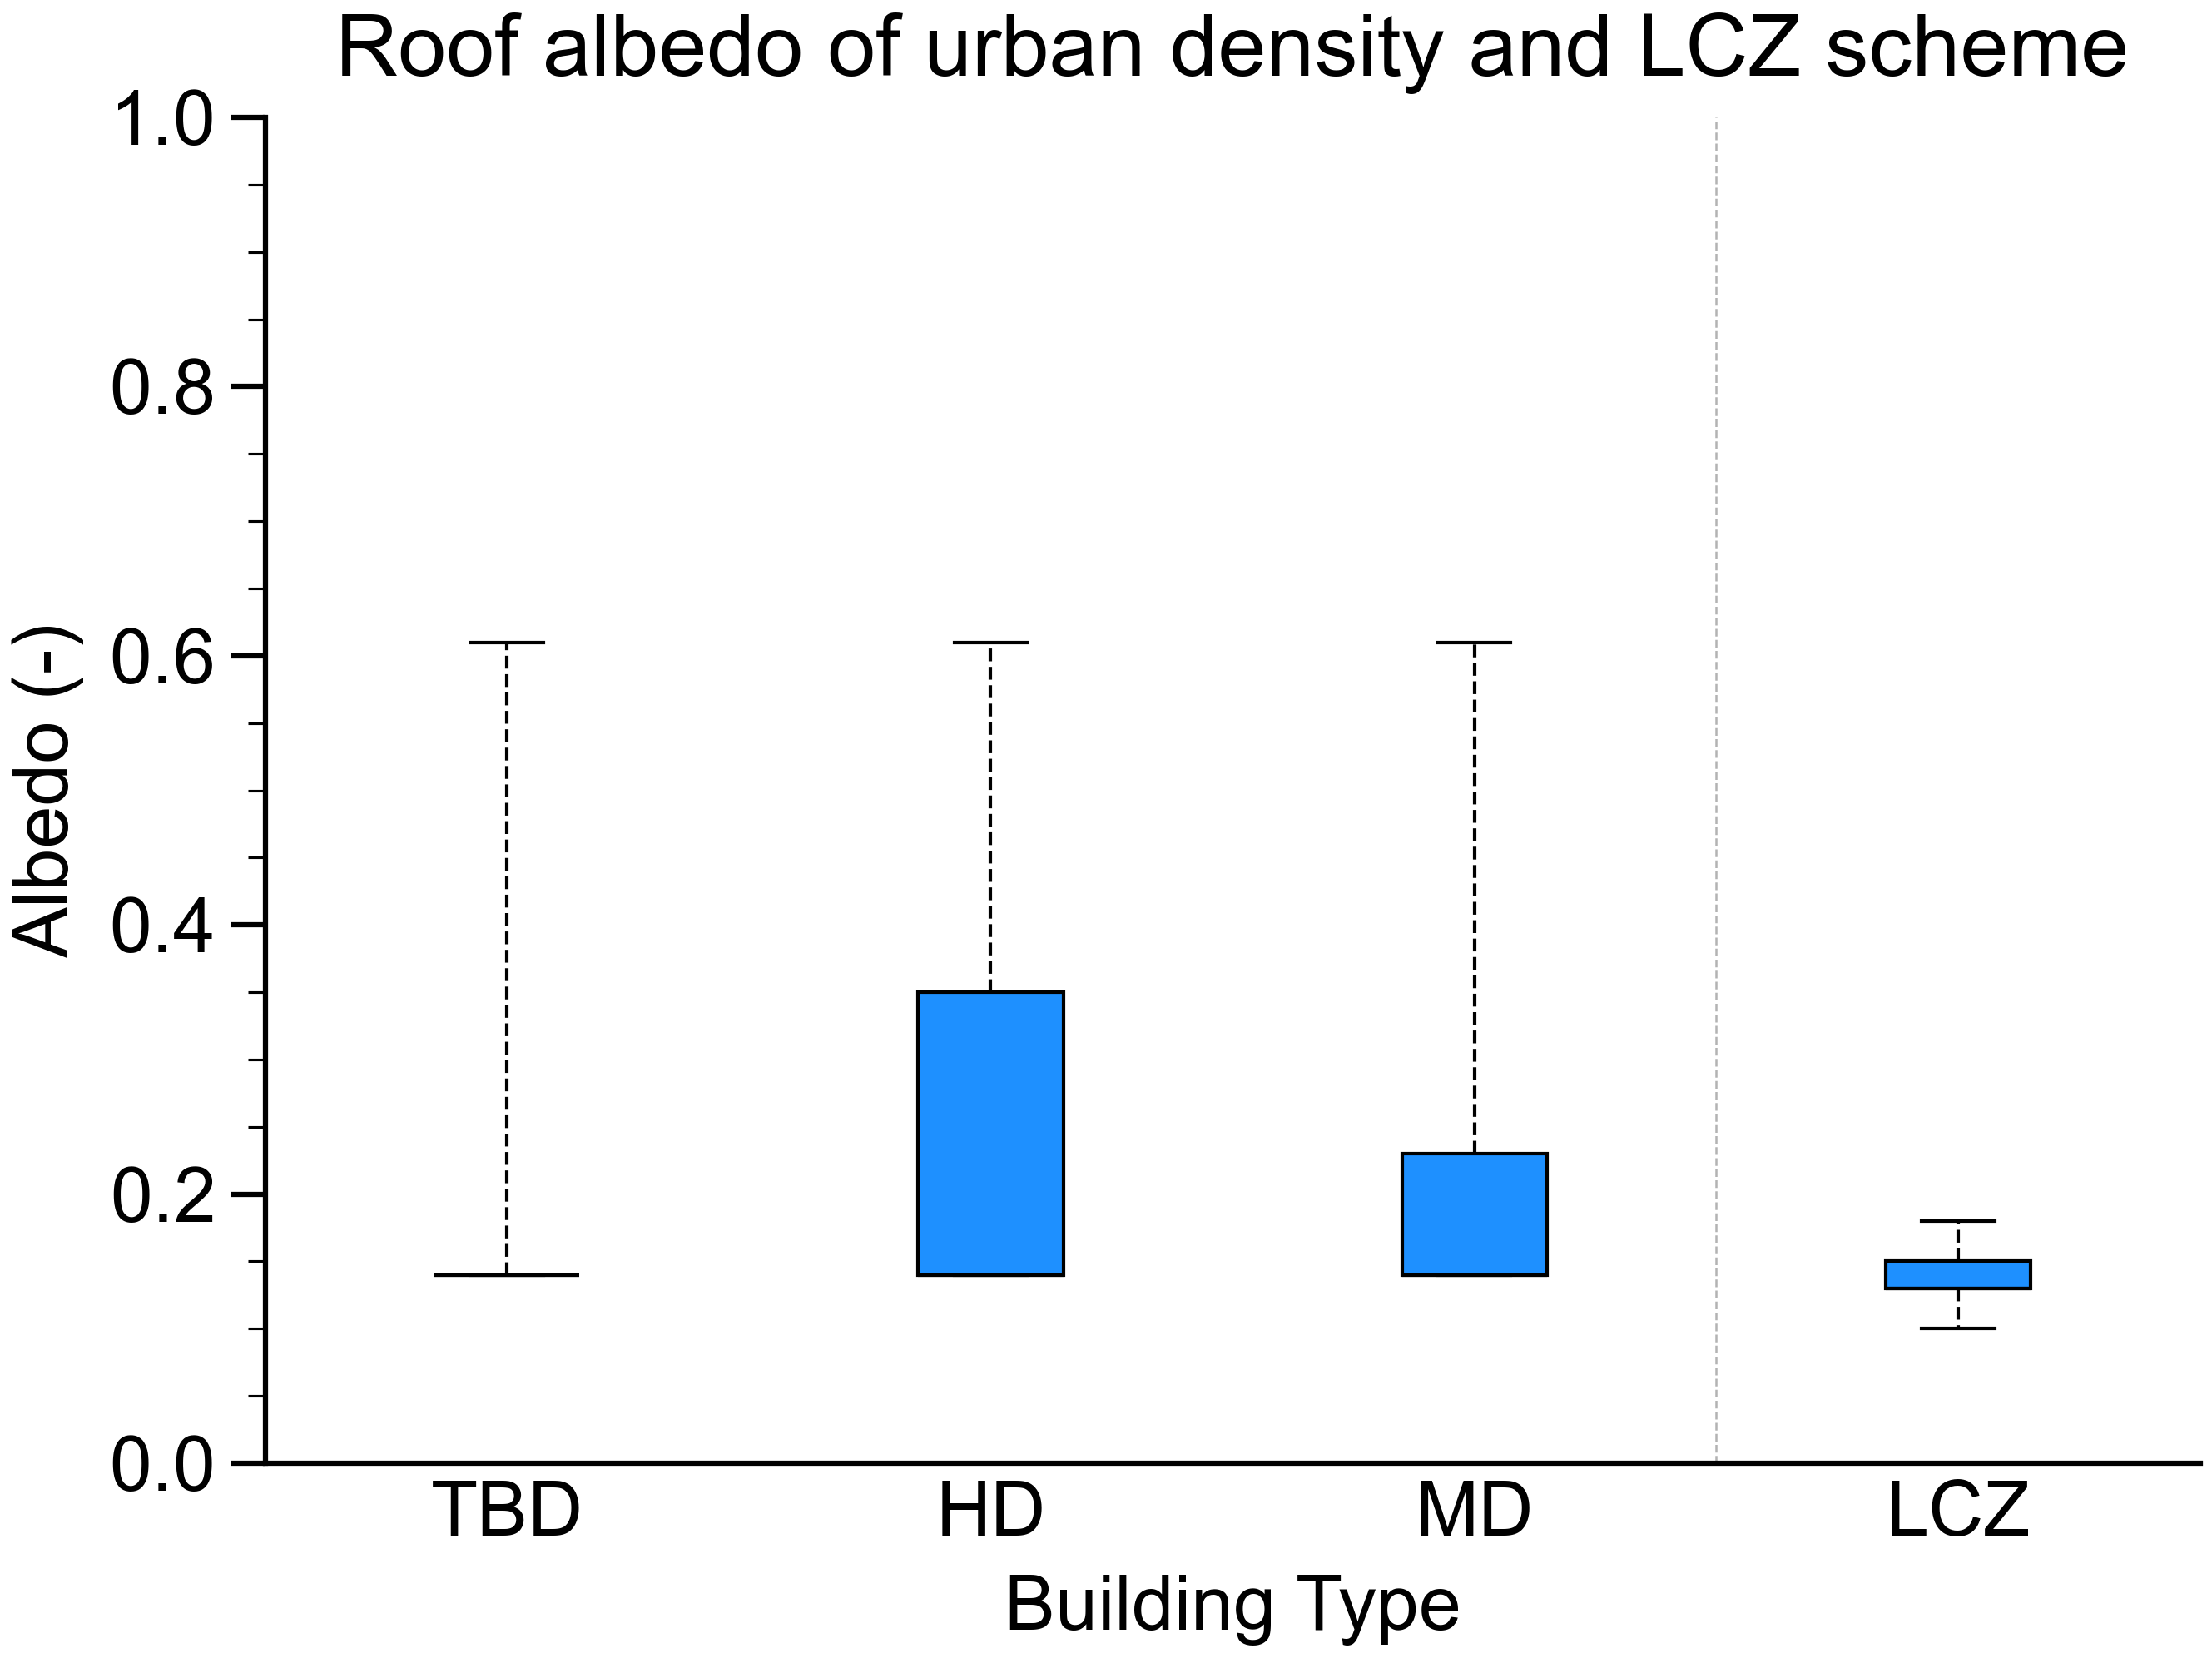

In [5]:
fig, ax2 = plt.subplots(figsize=(10, 7), dpi=300)

boxplots = ax2.boxplot(alb_roof,
                        labels=['TBD', 'HD', 'MD', 'LCZ'],
                        widths=0.3,
                        whis=[0,100],
                        notch=False,
                        showfliers=True,
                        patch_artist=True)

colors = ['dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

plt.setp(boxplots['medians'], color='black')
plt.setp(boxplots['whiskers'], linestyle='--')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlabel("Building Type", fontsize=22)
ax2.set_ylabel("Albedo (-)", fontsize=22)

gvutil.set_axes_limits_and_ticks(ax2,
                                 ylim=(0.0, 1),
                                 yticks=np.arange(0, 1.2, 0.2))

gvutil.add_major_minor_ticks(ax2,
                             y_minor_per_major=4,
                             x_minor_per_major=1,
                             labelsize=25)

ax2.set_title('Roof albedo of urban density and LCZ scheme', fontsize=25)#, pad=10)#, weight='bold')

ax2.set_xticklabels(['TBD', 'HD', 'MD', 'LCZ'], fontsize=22)
ax2.tick_params(axis='y', direction="out", which='major', labelsize=22, width=1.5 , length=10)
ax2.tick_params(axis='y', direction="out", which='minor', labelsize=22, width=0.75, length=5 )

ax2.tick_params(axis='x', direction="out", which='major', labelsize=22, width=1.5 , length=0)
ax2.tick_params(axis='x', direction="out", which='minor', labelsize=22, width=0.75, length=0 )

ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

for xpos in [3.5]:
    ax2.axvline(xpos, color="0.7", linestyle="--", linewidth=0.6, zorder=0)

for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

plt.subplots_adjust(wspace=0.35, hspace=0.4)

plt.savefig('Figure4.pdf', bbox_inches='tight', dpi=300)